In [7]:
import numpy as np
import scipy as scp
from pyedflib import highlevel
import pyedflib as plib
import matplotlib.pyplot as plt
import mne as mne
import os

Extracting EDF parameters from c:\Users\tomas\Desktop\Trabalho\FEUP\Neuro\Project\eegaming\dataset\files\S001\S001R03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Loading data for 30 events and 321 original time points ...
0 bad epochs dropped
Extracting EDF parameters from c:\Users\tomas\Desktop\Trabalho\FEUP\Neuro\Project\eegaming\dataset\files\S001\S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Not setting metadata
30 matching events found
No baseline correction applied
0 projection items activated
Loading data for 30 events and 321 original time points ...
0 bad epochs dropped
Extracting EDF parameters from c:\Users\tomas\Desktop\Trabalho\FEUP\Neuro\Project\eegaming\dataset\files\S001\

C:\Users\tomas\AppData\Local\Temp\ipykernel_16924\1345489850.py:45: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  all_epochs = mne.concatenate_epochs(all_epochs)
C:\Users\tomas\AppData\Local\Temp\ipykernel_16924\1345489850.py:46: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  plt.plot(all_epochs.get_data()[:, 9, :])


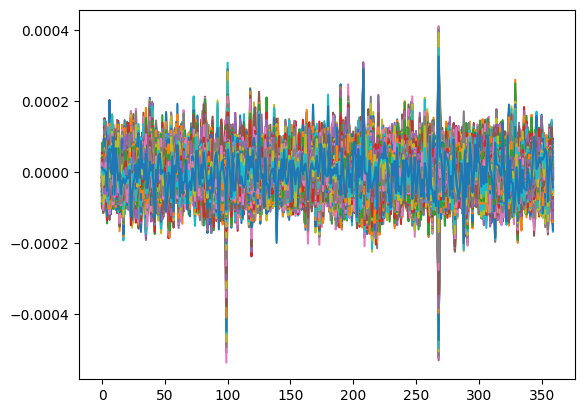

In [26]:
Subject = "001"
# signals, signal_headers, header = highlevel.read_edf("../dataset/files/S" + Subject + "/S" + Subject + "R" + Rep + ".edf")

path = "../dataset/files/S" + Subject + "/"

filenames = os.listdir(path)

filenames = [f for f in filenames if f.endswith(".edf")]
i = 0
tinit = 0.1
tfin = 2.1
all_epochs = []

for f in filenames:   
    
    # Os primeiros dois eventos no dataset (primeiros dois ficheiros na folder) são baseline com olhos fechados e abertos, ignoro 
    if i > 1:
        raw = mne.io.read_raw(str(path + f))

        #   trials em que se faz mão esquerda vs direita (LR) e 2 mãos vs pés (UD)
        LR = {3, 4, 7, 8, 11, 12}
        UD = {5, 6, 9, 10, 13, 14}
        
        # Separar o encode que havia, para distinguir entre rest (1), mão esquerda (2), direita (3), ambas (4) ou pés (5); criar encode para as epochs
        if i+1 in LR:
            ids = {"T0": 0, "T1": 1, "T2": 2}
            epoch_ids = {"rest": 0, "left": 1, "right": 2}
        elif i+1 in UD:
            ids ={"T0": 0, "T1": 3, "T2": 4}
            epoch_ids = {"rest": 0, "hands": 3, "feet": 4}

        events = mne.events_from_annotations(raw, event_id = ids) 

        # Criar epochs nos dados, usando a chave estabelecida no if anterior
        # preload coloca as epochs na memoria
        # detrend serve para lidar com muscle artifacts 
        # TODO: aplicar isto ao sinal filtrado e não ao raw
        epoch = mne.Epochs(raw, events[0], epoch_ids, tinit, tfin, baseline = None, detrend = None, preload = True)
        
        all_epochs.append(epoch)
        
    
    i += 1

all_epochs = mne.concatenate_epochs(all_epochs)
plt.plot(all_epochs.get_data()[:, 9, :])
# plt.figure() 
# plt.plot(all_epochs)



In [9]:
print(raw.times)

[0.0000000e+00 6.2500000e-03 1.2500000e-02 ... 1.2498125e+02 1.2498750e+02
 1.2499375e+02]


In [10]:
# signum = 64
# signal = signals[signum-1]
# plt.plot(signal)
# plt.title(signal_headers[signum-1]['label'])



In [11]:
print(mne.events_from_annotations(raw))

Used Annotations descriptions: ['T0', 'T1', 'T2']
(array([[    0,     0,     1],
       [  672,     0,     3],
       [ 1328,     0,     1],
       [ 2000,     0,     2],
       [ 2656,     0,     1],
       [ 3328,     0,     3],
       [ 3984,     0,     1],
       [ 4656,     0,     2],
       [ 5312,     0,     1],
       [ 5984,     0,     2],
       [ 6640,     0,     1],
       [ 7312,     0,     3],
       [ 7968,     0,     1],
       [ 8640,     0,     2],
       [ 9296,     0,     1],
       [ 9968,     0,     3],
       [10624,     0,     1],
       [11296,     0,     2],
       [11952,     0,     1],
       [12624,     0,     3],
       [13280,     0,     1],
       [13952,     0,     3],
       [14608,     0,     1],
       [15280,     0,     2],
       [15936,     0,     1],
       [16608,     0,     3],
       [17264,     0,     1],
       [17936,     0,     2],
       [18592,     0,     1],
       [19264,     0,     3]]), {'T0': 1, 'T1': 2, 'T2': 3})
